In [1]:
import pandas as pd

In [2]:
import os
import sys
dir_path = '/'.join(os.path.realpath('.').split('/')[:-1])
print(dir_path)
sys.path.append(f'{dir_path}/sabatinilab-glm/backend')
sys.path.append(f'{dir_path}/..')
sys.path.append(f'{dir_path}/backend')
sys.path.append(f'{dir_path}/../backend')

import time
import numpy as np
import sglm
import sglm_cv
import sglm_pp
import sglm_ez
import sglm_plt as splt
import sglm_save as ssave
from lynne_pp import *
import pandas as pd
import matplotlib.pyplot as plt


/Users/josh/Documents/Harvard/GLM


In [3]:
df = pd.read_csv('/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10062021.txt')
df = df[[_ for _ in df.columns if 'Unnamed' not in _]]
df = rename_columns(df)
df = define_trial_starts_ends(df, trial_shift_bounds=1)

lb = 2000
ub = 3000

plt.figure(figsize=(10,5))
care = df.iloc[lb:ub]
for col in ['trial_start_flag', 'trial_end_flag', 'cpn', 'lpn', 'rpn', 'lpx', 'rpx']:
    if col == 'trial_start_flag':
        marker = '^'
        mult = 0.5
    elif col == 'trial_end_flag':
        marker = 'v'
        mult = 0.5
    else:
        marker = '.'
        if col[-1] == 'n':
            mult = 0.6
        else:
            mult = 0.4
    care_filt = care#[care[col] > 0]
    plt.scatter(care_filt.index, care_filt[col]*mult, label=col, alpha=0.5, marker=marker)
plt.ylim(0,1)
plt.grid(True, which='both')
plt.legend()

In [5]:
import glob

df2 = pd.DataFrame()

data_folder = '/Users/josh/Documents/Harvard/GLM'

# GLM_SIGNALS_WT61_10062021.txt

for fn in glob.glob(f'{data_folder}/GLM_SIGNALS_WT61_*.txt'):
    print(fn)
    df = pd.read_csv(fn)
    df = df[[_ for _ in df.columns if 'Unnamed' not in _]]
    df = rename_columns(df)
    df = define_trial_starts_ends(df, trial_shift_bounds=1)
    df2 = preprocess_lynne(df)
    if len(df2) == 0:
        df2 = df.copy()
    else:
        df2 = pd.concat([df2, df])

/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10152021.txt
Percent of Data in ITI: 0.37677113634231024
/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10042021.txt
Percent of Data in ITI: 0.40049685032383997
/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10062021.txt
Percent of Data in ITI: 0.39600316444811334
/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10132021.txt
Percent of Data in ITI: 0.37595240263485413
/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10082021.txt
Percent of Data in ITI: 0.3455994204998189
/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10182021.txt
Percent of Data in ITI: 0.4347816304029881
/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10112021.txt
Percent of Data in ITI: 0.3137747521409082


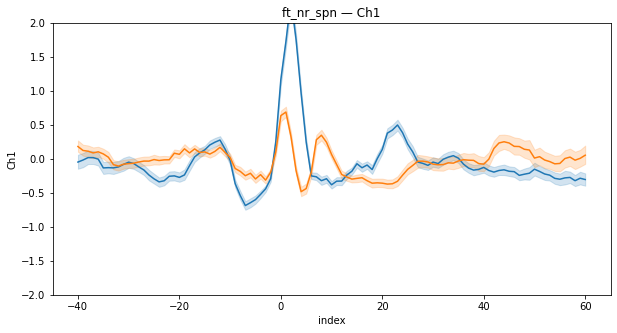

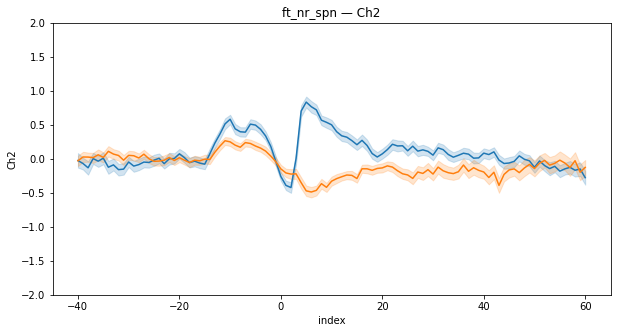

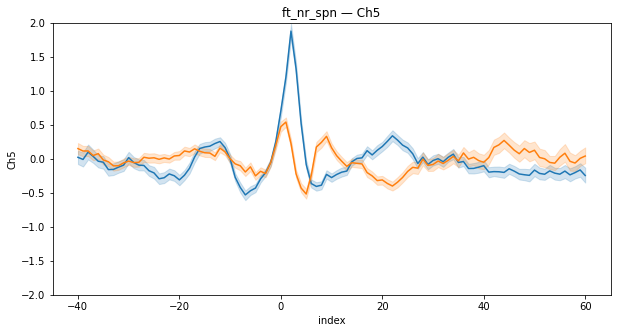

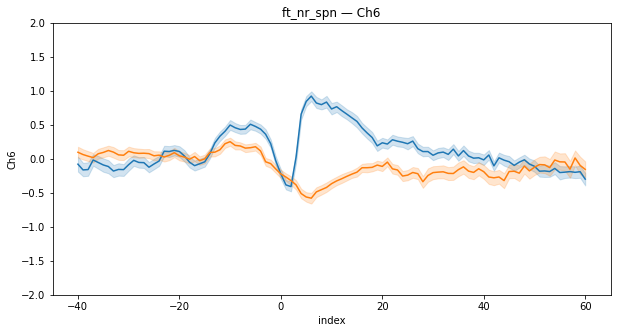

,index,Ch1,Ch2,Ch5,Ch6,cpo,cpn,cpx,rpo,rpn,...,ft_lpx,ft_rpx,ft_spx,ft_cpn,ft_r_rpn,ft_r_lpn,ft_r_spn,ft_nr_rpn,ft_nr_lpn,ft_nr_spn
0,-121,-0.421247,0.582888,2.111744,0.803076,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,-120,-0.805391,0.654144,0.989642,1.476919,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-119,-1.283941,0.132900,0.344234,0.698541,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-118,-1.548458,0.660776,-1.094858,0.378349,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-117,-1.141231,0.825659,-1.107253,0.860866,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,240,2.562576,-1.677753,1.878167,0.133261,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
778,241,4.246441,-0.236823,4.886373,-0.874492,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
779,242,4.408608,-0.663953,4.798602,-0.210249,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
780,243,2.364343,0.720721,2.718583,1.764168,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
import seaborn as sns
for channel in ['Ch1', 'Ch2', 'Ch5', 'Ch6']:
    plt.figure(figsize=(10,5))
    for alignment_col in ['ft_r_spn', 'ft_nr_spn']:
        relative_df = pd.DataFrame()
        rel_points = df2[df2[alignment_col] > 0].reset_index()
        identifiers = rel_points[['index', 'nTrial', 'nEndTrial']].dropna().values.astype(int)
        for idx, nTrial, nEndTrial in identifiers:
            extended_trial = df2[(df2['nTrial'] == nTrial) | (df2['nEndTrial'] == nEndTrial)].reset_index().copy()
            extended_trial['index'] -= idx

            if len(relative_df) == 0:
                relative_df = extended_trial.copy()
            else:
                relative_df = pd.concat([relative_df, extended_trial])
        
        alignment_name = alignment_col.split('_')[-1]
        sns.lineplot(x='index', y=channel, data=relative_df[relative_df['index'].between(-40, 60)], label=f'{alignment_col} — {channel}')
        plt.title(f'{alignment_name} — {channel}')
        plt.ylim(-1.5,1.5)
        plt.grid()
    plt.legend()
    plt.show()

display(relative_df)